## Problem definition
> Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

# Data
* `Train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.
* The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.
  
**Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.**

## Data Dictionary
Data Dictionary
Variable	Definition	                                  Key

survival	Survival	                                  0 = No, 1 = Yes

pclass	    Ticket class	                              1 = 1st, 2 = 2nd, 3 = 3rd

sex	        Sex	

Age	        Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	   Ticket number	

fare	   Passenger fare	

cabin	   Cabin number	

embarked	Port of Embarkation	                          C = Cherbourg, Q = Queenstown, S = Southampton

## Variable Note
* pclass: A proxy for socio-economic status (SES)
  * 1st = Upper
  * 2nd = Middle
  * 3rd = Lower
* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* sibsp: The dataset defines family relations in this way...
  * Sibling = brother, sister, stepbrother, stepsister
  * Spouse = husband, wife (mistresses and fiancés were ignored)
* parch: The dataset defines family relations in this way...
  * Parent = mother, father
  * Child = daughter, son, stepdaughter, stepson
 
**Some children travelled only with a nanny, therefore parch=0 for them.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset
titanic_train=pd.read_csv("data/titanic/train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

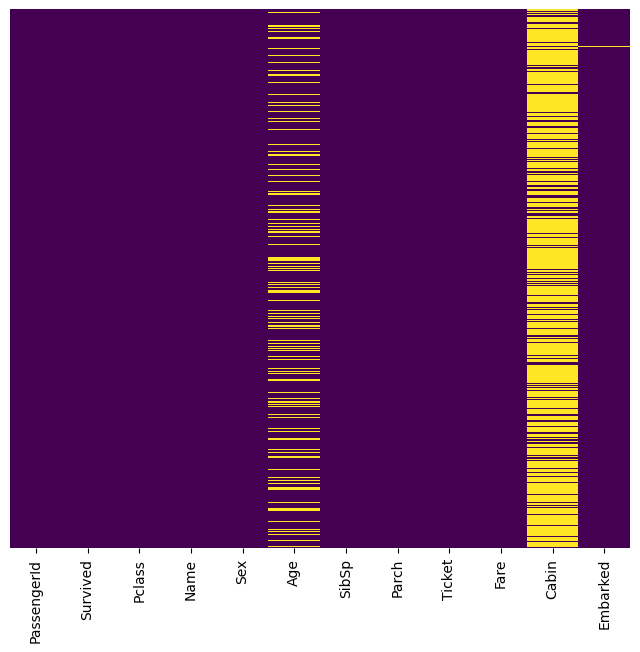

In [4]:
#Visualixing all the null vlaues from the columns of the dataset with the help of a heatmap
fig,ax=plt.subplots(figsize=(8,7))
ax=sns.heatmap(titanic_train.isnull(),
              yticklabels=False,
               cbar=False,
              fmt=".2f",
              cmap="viridis")

Here we can see that about 20-25% of `Age` column is miising or having null values we can **Impute** them if we want however the `Cabin` column has a huge amount of missing values which makes imputation a little challenging, so we might drop the missing rows later  

<Axes: xlabel='Survived', ylabel='count'>

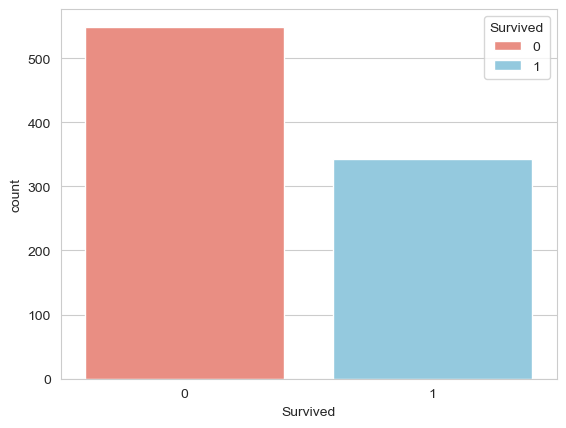

In [5]:
#lets see how many people survived and how many didn't
sns.set_style(style="whitegrid")
sns.countplot(data=titanic_train,hue='Survived',x="Survived",palette=["salmon","skyblue"])

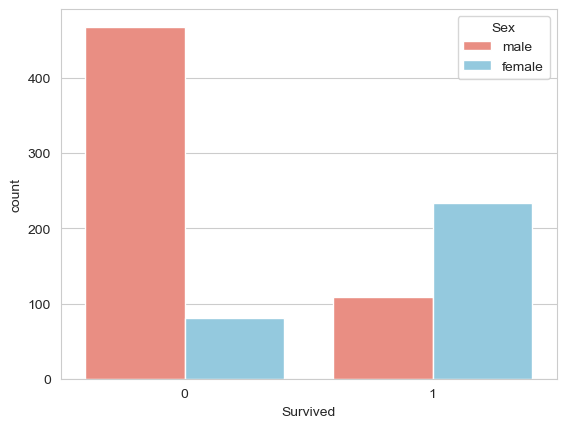

In [6]:
sns.set_style("whitegrid")
sns.countplot(data=titanic_train,hue="Sex",x="Survived",palette=["salmon","skyblue"]);

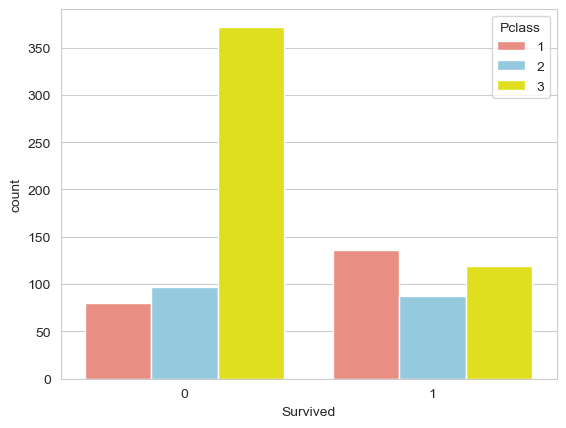

In [7]:
sns.set_style("whitegrid")
sns.countplot(data=titanic_train,hue="Pclass",x="Survived",palette=["salmon","skyblue","yellow"]);

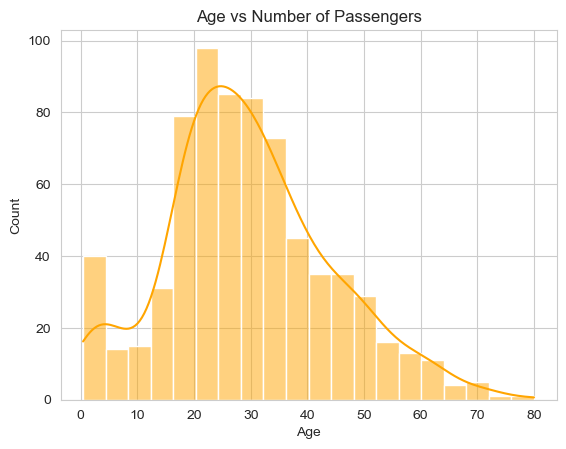

In [8]:
sns.histplot(titanic_train,x='Age',color='orange',kde=True)
plt.title("Age vs Number of Passengers");

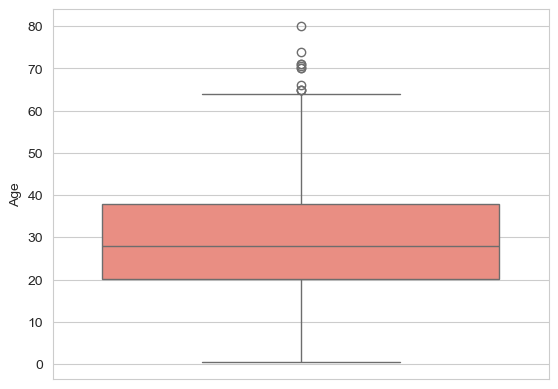

In [9]:
sns.boxplot(titanic_train["Age"],color='salmon');

Here we can see that the maximum people who were travelling in the titanic belonged from the age group of 20-40 and the least is of age group 80

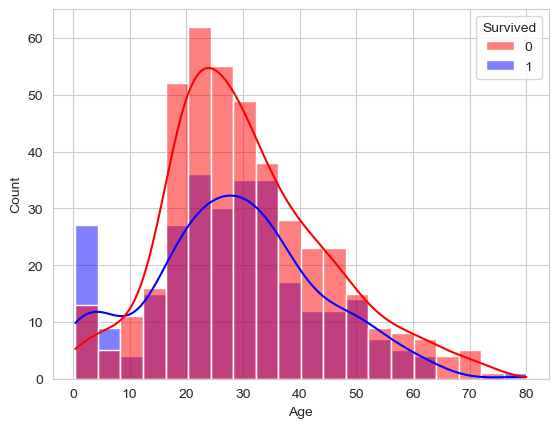

In [10]:
sns.histplot(titanic_train,x='Age',hue="Survived",kde=True,palette={0:'red',1:'blue'});

**Here we can see clearly that the people of age group 20-40 were the most to die while the the age group of 0-5 survived the most** 

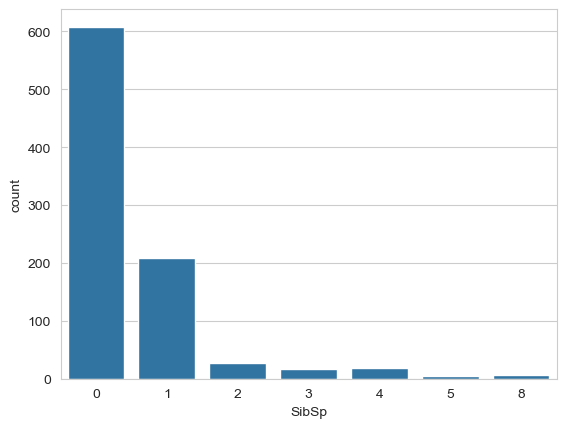

In [11]:
#Now let's find the number of people who had siblings and spouses
sns.countplot(titanic_train,x='SibSp');

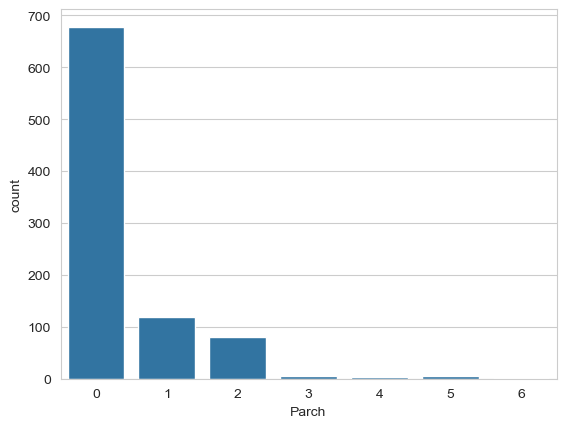

In [12]:
sns.countplot(titanic_train,x="Parch");

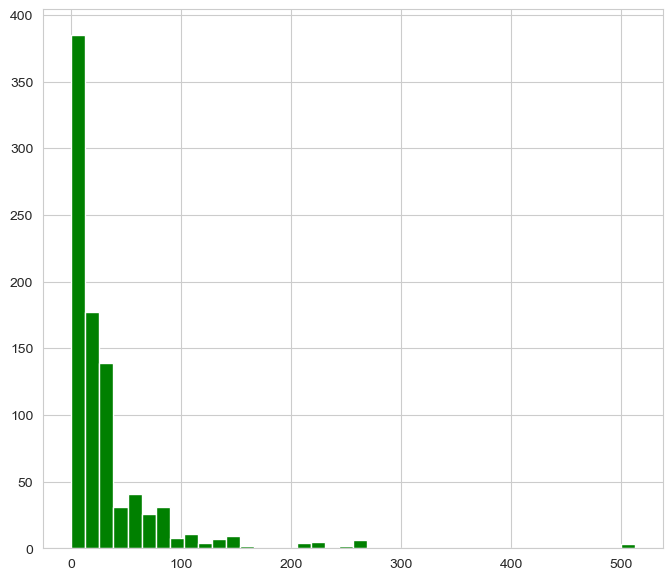

In [13]:
titanic_train.Fare.hist(color='green',bins=40,figsize=(8,7));

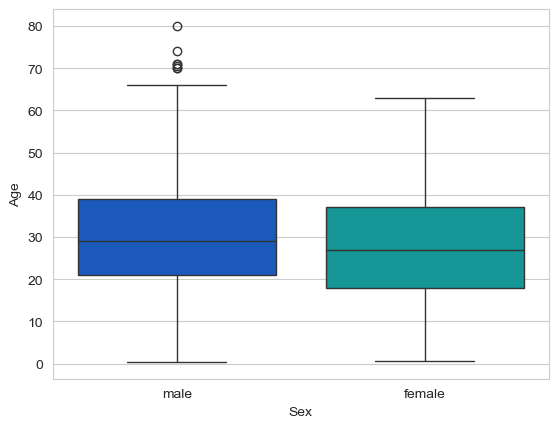

In [14]:
sns.set_style('whitegrid')
sns.boxplot(titanic_train,x='Sex',hue='Sex',y='Age',palette='winter');

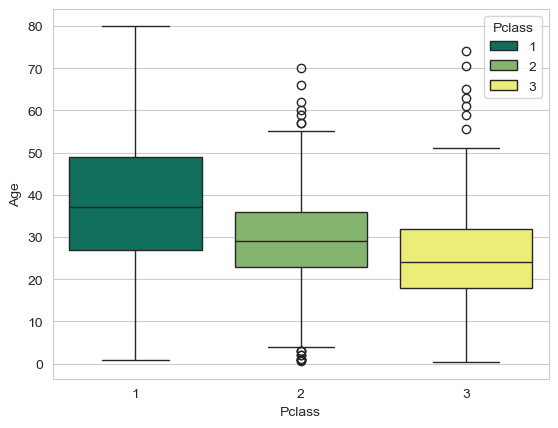

In [15]:
sns.set_style('whitegrid')
sns.boxplot(titanic_train,x='Pclass',hue='Pclass',y='Age',palette='summer');

Now if we analyze **Pclass vs Age** plot then we will find some rather interesting relations-
* when passenger class or `Pclass` is 1 the `Age` group ranges from **>25 to <50**.
* when passenger class or `Pclass` is 2 the `Age` group ranges from **>20 to <40**.
* when passenger class or `Pclass` is 3 the `Age` group ranges from **>15 to <35**.

Previously we saw that our `Age` column has many null values so we can try to impute those null values by those values that lies in the above mentioned ranges depending upon the `Pclass` column

In [16]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if(pclass==1):
            return 36
        elif(pclass==2):
            return 28
        else:
            return 24
    else:
        return age

In [17]:
titanic_train['Age']=titanic_train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\USER\AppData\Local\Temp\ipykernel_17032\2479722150.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=cols[0]
C:\Users\USER\AppData\Local\Temp\ipykernel_17032\2479722150.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass=cols[1]


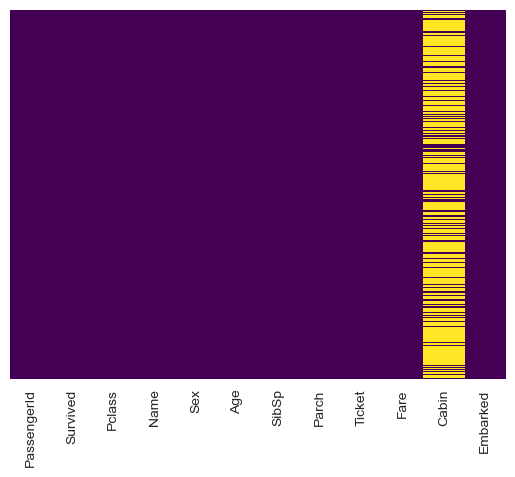

In [18]:
sns.heatmap(titanic_train.isnull(),cbar=False,yticklabels=False,cmap='viridis');

Now we just have to remove the null values from `Cabin` and `Embarked` columns which we can do by droping the `Cabin` column altogether and remove null rows from `Embarked` column.

In [19]:
titanic_train.drop("Cabin",axis=1,inplace=True)

In [20]:
titanic_train.dropna(inplace=True)

In [21]:
titanic_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

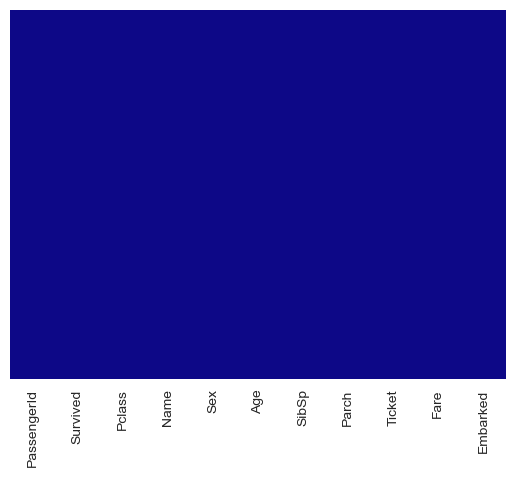

In [22]:
sns.heatmap(titanic_train.isnull(),cbar=False,yticklabels=False,cmap='plasma');

And now we finally got rid of all the null values.

### Converting categorical features
Now we will need to convert the features to dummy variables for our machine learning model to process the data correctly

In [23]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [24]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
sex=pd.get_dummies(titanic_train["Sex"],drop_first=True)
embark=pd.get_dummies(titanic_train["Embarked"],drop_first=True)

In [26]:
titanic_train.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [27]:
titanic_train=pd.concat([titanic_train,sex,embark],axis=1)

In [28]:
titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


**With this, our data is ready to be applied over the appropriate model**

In [29]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [30]:
np.random.seed(50)
X=titanic_train.drop("Survived",axis=1)
y=titanic_train["Survived"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

models={
    "LogisticRegression":LogisticRegression(C=17.433288221999874,solver='liblinear'),
    "RandomForestClassifier":RandomForestClassifier()
}
result={}
for key,model in models.items():
    model.fit(X_train,y_train)
    result[key]=model.score(X_test,y_test)
result

{'LogisticRegression': 0.8202247191011236,
 'RandomForestClassifier': 0.8089887640449438}

In [31]:
for key,model in models.items():
    print(model.predict(X_test))

[0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1
 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0]
[1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [32]:
models["LogisticRegression"].predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0])

**Now we are gonna try to improve our model of LogisticRegression because it's currently having the most accuracy**

In [33]:
log_reg_grid={
    "C":np.logspace(-4,4,30),
    "solver":['liblinear']
}
Random_reg_grid={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}
gs_model=GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=log_reg_grid,
    n_jobs=1,
    cv=5,
    verbose=True
)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [34]:
gs_model.best_params_

{'C': np.float64(0.7278953843983146), 'solver': 'liblinear'}

In [35]:
gs_model.score(X_test,y_test)

0.8146067415730337

In [36]:
for key,model in models.items():
    model.fit(X_train,y_train)
    result[key]=model.score(X_test,y_test)
result

{'LogisticRegression': 0.8202247191011236,
 'RandomForestClassifier': 0.8089887640449438}

In [37]:
cvv_prec=cross_val_score(
    gs_model,
    X,
    y,
    cv=5,
    scoring="precision"
)
cvv_prec

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.71212121, 0.78333333, 0.73134328, 0.75      , 0.75384615])

In [38]:
cvv_prec=np.mean(cvv_prec)
cvv_prec

np.float64(0.7461287965765578)

In [39]:
cvv_recall=cross_val_score(
    gs_model,
    X,
    y,
    cv=5,
    scoring="recall"
)
cvv_recall

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.69117647, 0.69117647, 0.72058824, 0.61764706, 0.72058824])

In [40]:
cvv_recall=np.mean(cvv_recall)
cvv_recall

np.float64(0.6882352941176471)

In [41]:
cvv_f1=cross_val_score(
    gs_model,
    X,
    y,
    cv=5,
    scoring="f1"
)
cvv_f1

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.70149254, 0.734375  , 0.72592593, 0.67741935, 0.73684211])

In [42]:
cvv_f1=np.mean(cvv_f1)
cvv_f1

np.float64(0.7152109846682453)

In [43]:
y_preds=gs_model.predict(X_test)

In [44]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       112
           1       0.80      0.67      0.73        66

    accuracy                           0.81       178
   macro avg       0.81      0.78      0.79       178
weighted avg       0.81      0.81      0.81       178



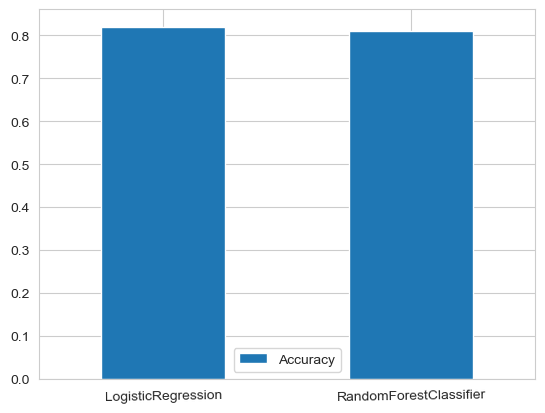

In [45]:
model_comp=pd.DataFrame(result,index=["Accuracy"])
model_comp.T.plot.bar()
plt.xticks(rotation=1);

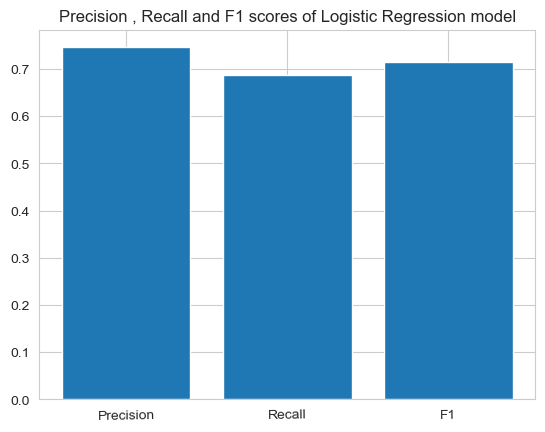

In [46]:
fig,ax=plt.subplots()
ax.bar(height=[cvv_prec,cvv_recall,cvv_f1],x=["Precision","Recall","F1"])
plt.title("Precision , Recall and F1 scores of Logistic Regression model")
plt.xticks(rotation=1);

### Converting categories into numbers
We can convert string inputs and categories into numbers with the help of pandas categories

In [47]:
df_tmp.head().T

NameError: name 'df_tmp' is not defined

In [ ]:
titanic_train.head()

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model=XGBClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
params={
    "max_depth":[3,4,5,6,8],
    "min_child_split":[1,3,5],
    "gamma":[0,0.1,0.2,0.3],
    "subsample":[0.6,0.8,1.0],
    "colsample_bytree":[0.6,0.8,1.0],
    "learning_rate":[0.01,0.05,0.1,0.2],
    "n_estimators":[100,200,500]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
tuned_model=RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    scoring="roc_auc",
    cv=3,
    n_iter=20,
    n_jobs=-1,
    verbose=True
)
tuned_model.fit(X_train,y_train)

In [ ]:
tuned_model.score(X_test,y_test)